In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [132]:
# pulling the data from the csv file 
df = pd.read_csv("zomatowithsensor_csv")
df

,Name,Aggregate Rating,Type,Price,Latitude,Longitude,Sensor ID,Sensor
0,Soul Cafe,3.0,"Coffee and Tea, Cafe Food",3,-37.813075,144.965281,1,Bourke Street Mall (North)
1,Song Tea,3.5,Bubble Tea,1,-37.813810,144.965600,1,Bourke Street Mall (North)
2,Sensory Lab - Bourke Street,3.4,"Coffee and Tea, Sandwich, Desserts",2,-37.813398,144.964499,1,Bourke Street Mall (North)
3,SamSam,4.0,Korean,3,-37.812885,144.965210,1,Bourke Street Mall (North)
4,Boost Juice,3.7,"Juices, Beverages",1,-37.813798,144.965849,1,Bourke Street Mall (North)
...,...,...,...,...,...,...,...,...
106,The Borek Bakehouse,4.4,"Bakery, Middle Eastern",1,-37.807711,144.960005,26,QV Market-Elizabeth St (West)
107,Chickcha,3.7,"Coffee and Tea, Cafe Food",2,-37.809073,144.961767,26,QV Market-Elizabeth St (West)
108,Damiao Panda Fan 大妙火锅 · 川菜,3.0,"Hot Pot, Sichuan, Chinese",3,-37.809614,144.961199,26,QV Market-Elizabeth St (West)
109,Mansae Korean BBQ & Bar,4.5,"Korean, Korean BBQ",4,-37.809563,144.959607,26,QV Market-Elizabeth St (West)


In [133]:
df.count()

Name                111
Aggregate Rating    111
Type                111
Price               111
Latitude            111
Longitude           111
Sensor ID           111
Sensor              111
dtype: int64

In [134]:
df.dtypes

Name                 object
Aggregate Rating    float64
Type                 object
Price                 int64
Latitude            float64
Longitude           float64
Sensor ID             int64
Sensor               object
dtype: object

In [135]:
# grouping by the date and applying aggregates
grouped = df.groupby(["Sensor"])
averages_df = grouped[['Aggregate Rating','Price']].mean()
averages_df.head()

,Aggregate Rating,Price
Sensor,,
Bourke Street Mall (North),3.037838,2.000000
Flinders St-Spark La,3.621622,2.594595
QV Market-Elizabeth St (West),3.767568,2.351351


In [136]:
averages_df["Yearly Average Ped Count"] = ""
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.037838,2.000000,
Flinders St-Spark La,3.621622,2.594595,
QV Market-Elizabeth St (West),3.767568,2.351351,


In [137]:
location_averages_df = pd.read_csv("../Output/average_daily_3locations.csv")
location_averages_df

,Bourke Street Mall (North),Flinders St-Spark La,QV Market-Elizabeth St (West)
0,1458.750000,154.833333,551.000000
1,1283.727273,138.818182,512.181818
2,1384.791667,180.416667,588.875000
3,1442.583333,101.375000,683.333333
4,1296.041667,147.750000,388.500000
...,...,...,...
356,1438.166667,138.791667,577.958333
357,1133.666667,133.625000,383.375000
358,1304.083333,146.083333,583.583333
359,1299.125000,105.333333,633.041667


In [138]:
each_average = location_averages_df.mean()
each_average

Bourke Street Mall (North)       1356.533147
Flinders St-Spark La              146.969334
QV Market-Elizabeth St (West)     607.676036
dtype: float64

In [139]:
averages_df["Yearly Average Ped Count"]=each_average
averages_df

,Aggregate Rating,Price,Yearly Average Ped Count
Sensor,,,
Bourke Street Mall (North),3.037838,2.000000,1356.533147
Flinders St-Spark La,3.621622,2.594595,146.969334
QV Market-Elizabeth St (West),3.767568,2.351351,607.676036


In [140]:
averages_df.reset_index(inplace=True)
averages_df

,Sensor,Aggregate Rating,Price,Yearly Average Ped Count
0,Bourke Street Mall (North),3.037838,2.000000,1356.533147
1,Flinders St-Spark La,3.621622,2.594595,146.969334
2,QV Market-Elizabeth St (West),3.767568,2.351351,607.676036


In [141]:
averages_df.to_csv("../Output/sensors3_average_rating_price_pedestrians.csv")

In [142]:
averages_df.dtypes

Sensor                       object
Aggregate Rating            float64
Price                       float64
Yearly Average Ped Count    float64
dtype: object

Text(0, 0.5, 'Average restaurant price')

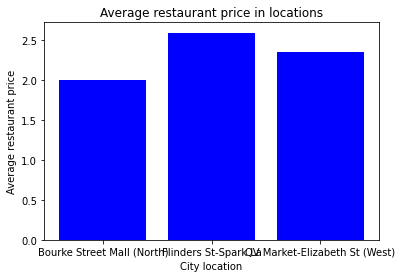

In [150]:
locations = averages_df["Sensor"]
price = averages_df["Price"]
# Create a bar chart based upon the above data
plt.bar(locations, price, color="b", align="center")

plt.title("Average restaurant price in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant price")

<BarContainer object of 3 artists>

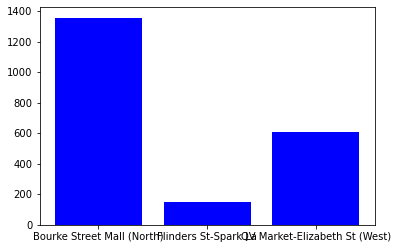

In [148]:
locations = averages_df["Sensor"]
footfall = averages_df["Yearly Average Ped Count"]
# Create a bar chart based upon the above data
plt.bar(locations, footfall, color="b", align="center")
plt.title("Average yearly pedestrian count in locations")
plt.xlabel("City location")
plt.ylabel("Average yearly pedestrian count")

Text(0, 0.5, 'Average restaurant rating')

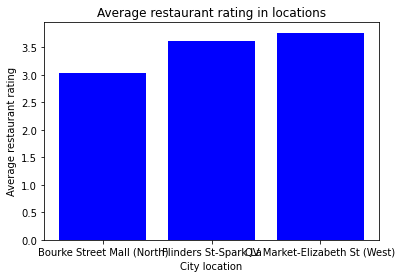

In [151]:
locations = averages_df["Sensor"]
rating = averages_df["Aggregate Rating"]
# Create a bar chart based upon the above data
plt.bar(locations, rating, color="b", align="center")
plt.title("Average restaurant rating in locations")
plt.xlabel("City location")
plt.ylabel("Average restaurant rating")